## Projeto

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
from pennylane.optimize import AdamOptimizer
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates.embeddings import AngleEmbedding
from tqdm.notebook import tqdm, trange

###  Exploring & understanding the features

In [2]:

# Read the HDF5 file using pandas
data_frame_fcnc = pd.read_hdf('fcnc_pythia_sanitised_features.h5')

# Get the number of rows
num_rows = data_frame_fcnc.shape[0]

print('Number of rows: {}'.format(num_rows))

# Explore the data
data_frame_fcnc.head()


Number of rows: 90548


,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,FatJet1_Phi,FatJet1_Tau1,FatJet1_Tau2,FatJet1_Tau3,FatJet1_Tau4,FatJet1_Tau5,...,gen_decay2,gen_decay_filter,gen_filter,gen_label,gen_n_btags,gen_sample,gen_sample_filter,gen_split,gen_weights,gen_xsec
0,2,1.408853,15.150869,339.182312,2.350262,1.396943,0.710451,0.109013,0.000000,0.000000,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,test,7.762202e-09,0.001285
1,1,-2.481838,7.208333,247.036240,-2.280740,0.428710,0.205213,0.000000,0.000000,0.000000,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,val,7.762202e-09,0.001285
2,0,1.476267,94.220718,238.014694,-1.788097,94.256210,2.418446,1.585315,1.127324,0.431098,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,train,7.762249e-09,0.001285
3,1,0.647480,13.459283,230.971832,-1.032663,1.227122,0.467150,0.164008,0.000000,0.000000,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,train,7.762249e-09,0.001285
4,0,2.106436,97.490242,698.399902,-3.059983,36.555862,2.937936,1.799140,1.093004,0.589724,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,train,7.762249e-09,0.001285


In [3]:
# Read the HDF5 file using pandas
data_frame_bkg = pd.read_hdf('bkg_pythia_sanitised_features.h5')

# Get the number of rows
num_rows = data_frame_bkg.shape[0]

print('Number of rows: {}'.format(num_rows))

# Explore the data
data_frame_bkg.head()


Number of rows: 1002490


,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,FatJet1_Phi,FatJet1_Tau1,FatJet1_Tau2,FatJet1_Tau3,FatJet1_Tau4,FatJet1_Tau5,...,gen_decay2,gen_decay_filter,gen_filter,gen_label,gen_n_btags,gen_sample,gen_sample_filter,gen_split,gen_weights,gen_xsec
0,2,-1.988600,52.710262,229.350952,0.728242,36.148926,23.039709,16.949991,14.424411,12.000529,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,train,0.000018,11.9635
1,0,0.528382,61.115589,315.538910,-0.863614,32.592808,22.366640,16.285843,13.938633,11.180016,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,test,0.000018,11.9635
2,0,1.479911,98.012802,251.109573,-3.133624,90.252274,33.646885,30.612156,27.973904,23.729696,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,val,0.000018,11.9635
3,2,0.926899,-0.000007,240.909348,0.835656,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,val,0.000018,11.9635
4,0,0.781194,72.234299,206.020386,-0.320449,48.886372,20.743645,16.572512,13.070706,11.269534,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,val,0.000018,11.9635


In [4]:
#explore the collums of the background data
print (data_frame_bkg.columns)

Index(['Electron_Multi', 'FatJet1_Eta', 'FatJet1_Mass', 'FatJet1_PT',
       'FatJet1_Phi', 'FatJet1_Tau1', 'FatJet1_Tau2', 'FatJet1_Tau3',
       'FatJet1_Tau4', 'FatJet1_Tau5', 'FatJet_Multi', 'Jet1_BTag', 'Jet1_Eta',
       'Jet1_Mass', 'Jet1_PT', 'Jet1_Phi', 'Jet2_BTag', 'Jet2_Eta',
       'Jet2_Mass', 'Jet2_PT', 'Jet2_Phi', 'Jet3_BTag', 'Jet3_Eta',
       'Jet3_Mass', 'Jet3_PT', 'Jet3_Phi', 'Jet4_BTag', 'Jet4_Eta',
       'Jet4_Mass', 'Jet4_PT', 'Jet4_Phi', 'Jet5_BTag', 'Jet5_Eta',
       'Jet5_Mass', 'Jet5_PT', 'Jet5_Phi', 'Jet_Multi', 'Lepton1_Eta',
       'Lepton1_PT', 'Lepton1_Phi', 'Lepton2_Eta', 'Lepton2_PT', 'Lepton2_Phi',
       'MissingET_MET', 'MissingET_Phi', 'Muon_Multi', 'ScalarHT_HT',
       'gen_decay1', 'gen_decay2', 'gen_decay_filter', 'gen_filter',
       'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter',
       'gen_split', 'gen_weights', 'gen_xsec'],
      dtype='object')


In [5]:
#explore the collums of the fcnc data
print (data_frame_fcnc.columns)

Index(['Electron_Multi', 'FatJet1_Eta', 'FatJet1_Mass', 'FatJet1_PT',
       'FatJet1_Phi', 'FatJet1_Tau1', 'FatJet1_Tau2', 'FatJet1_Tau3',
       'FatJet1_Tau4', 'FatJet1_Tau5', 'FatJet_Multi', 'Jet10_BTag',
       'Jet10_Eta', 'Jet10_Mass', 'Jet10_PT', 'Jet10_Phi', 'Jet1_BTag',
       'Jet1_Eta', 'Jet1_Mass', 'Jet1_PT', 'Jet1_Phi', 'Jet2_BTag', 'Jet2_Eta',
       'Jet2_Mass', 'Jet2_PT', 'Jet2_Phi', 'Jet3_BTag', 'Jet3_Eta',
       'Jet3_Mass', 'Jet3_PT', 'Jet3_Phi', 'Jet4_BTag', 'Jet4_Eta',
       'Jet4_Mass', 'Jet4_PT', 'Jet4_Phi', 'Jet5_BTag', 'Jet5_Eta',
       'Jet5_Mass', 'Jet5_PT', 'Jet5_Phi', 'Jet6_BTag', 'Jet6_Eta',
       'Jet6_Mass', 'Jet6_PT', 'Jet6_Phi', 'Jet7_BTag', 'Jet7_Eta',
       'Jet7_Mass', 'Jet7_PT', 'Jet7_Phi', 'Jet8_BTag', 'Jet8_Eta',
       'Jet8_Mass', 'Jet8_PT', 'Jet8_Phi', 'Jet9_BTag', 'Jet9_Eta',
       'Jet9_Mass', 'Jet9_PT', 'Jet9_Phi', 'Jet_Multi', 'Lepton1_Eta',
       'Lepton1_PT', 'Lepton1_Phi', 'Lepton2_Eta', 'Lepton2_PT', 'Lepton2_Phi',
       'Miss

In [6]:
#explore the data types of the background data
print (data_frame_bkg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1002490 entries, 0 to 1002489
Data columns (total 58 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Electron_Multi     1002490 non-null  int64  
 1   FatJet1_Eta        1002490 non-null  float64
 2   FatJet1_Mass       1002490 non-null  float64
 3   FatJet1_PT         1002490 non-null  float64
 4   FatJet1_Phi        1002490 non-null  float64
 5   FatJet1_Tau1       1002490 non-null  float64
 6   FatJet1_Tau2       1002490 non-null  float64
 7   FatJet1_Tau3       1002490 non-null  float64
 8   FatJet1_Tau4       1002490 non-null  float64
 9   FatJet1_Tau5       1002490 non-null  float64
 10  FatJet_Multi       1002490 non-null  int64  
 11  Jet1_BTag          1002490 non-null  float64
 12  Jet1_Eta           1002490 non-null  float64
 13  Jet1_Mass          1002490 non-null  float64
 14  Jet1_PT            1002490 non-null  float64
 15  Jet1_Phi           1002490 non-null  

In [7]:
#explore the data types of the fcnc data
print (data_frame_fcnc.info())

<class 'pandas.core.frame.DataFrame'>
Index: 90548 entries, 0 to 90547
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Electron_Multi     90548 non-null  int64  
 1   FatJet1_Eta        90548 non-null  float64
 2   FatJet1_Mass       90548 non-null  float64
 3   FatJet1_PT         90548 non-null  float64
 4   FatJet1_Phi        90548 non-null  float64
 5   FatJet1_Tau1       90548 non-null  float64
 6   FatJet1_Tau2       90548 non-null  float64
 7   FatJet1_Tau3       90548 non-null  float64
 8   FatJet1_Tau4       90548 non-null  float64
 9   FatJet1_Tau5       90548 non-null  float64
 10  FatJet_Multi       90548 non-null  int64  
 11  Jet10_BTag         90548 non-null  float64
 12  Jet10_Eta          90548 non-null  float64
 13  Jet10_Mass         90548 non-null  float64
 14  Jet10_PT           90548 non-null  float64
 15  Jet10_Phi          90548 non-null  float64
 16  Jet1_BTag          90548 no

### Histograms of Signal vs Background

#### 1. Normalize the data

In [8]:
# Z-score normalization

# copy the data to a new dataframe
data_frame_fcnc_norm = data_frame_fcnc.copy()
data_frame_bkg_norm = data_frame_bkg.copy()

# normalize the data except the categorical features and the weights
for feature in data_frame_fcnc.columns:
    if feature in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split', 'gen_decay2','gen_decay1', 'gen_xsec']:
        pass
    else: 
        data_frame_fcnc_norm[feature] = (data_frame_fcnc[feature] - data_frame_fcnc[feature].mean()) / data_frame_fcnc[feature].std()
        
for feature in data_frame_bkg.columns:
    if feature in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split','gen_decay2','gen_decay1','gen_xsec']:
        pass
    else:  
        data_frame_bkg_norm[feature] = (data_frame_bkg[feature] - data_frame_bkg[feature].mean()) / data_frame_bkg[feature].std()


#### 2. Plot histograms Signal Vs Background

In [9]:
# l is a list of the categorical features that are in both dataframes
l=[]
for i in data_frame_fcnc.columns:
    if  i in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split','gen_xsec']:pass
    elif i not in data_frame_bkg.columns.values: pass
    else: l.append(i)

In [10]:
# Plot histograms signal vs bkg for each feature

num_features = len(data_frame_fcnc.columns)
num_cols = 3
num_rows = math.ceil(len(l) / 3)

plt.clf()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

density = True

for i, feature in enumerate(l):
    if feature in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split', 'gen_xsec']:
        continue
    elif feature not in data_frame_bkg.columns.values:
        continue
    else:
        h_sgn, b = np.histogram(data_frame_fcnc_norm[feature], bins=100, density=density, weights=data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_label'] == 'signal', 'gen_xsec'])
        h_bkg, _ = np.histogram(data_frame_bkg_norm[feature], bins=100, density=density, weights=data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_label'] == 'bkg', 'gen_xsec'])

        bincentres = [(b[i] + b[i+1]) / 2. for i in range(len(b)-1)]
        binwidth = b[1] - b[0]

        axes[i // num_cols, i % num_cols].grid(True, linestyle='--', alpha=0.5)
        axes[i // num_cols, i % num_cols].set_title(feature)
        axes[i // num_cols, i % num_cols].bar(bincentres, h_bkg, label="Background", width=binwidth, color="tab:blue", alpha=0.5)
        axes[i // num_cols, i % num_cols].bar(bincentres, h_sgn, bottom=h_bkg if not density else 0, label="Signal", width=binwidth, color="tab:orange", alpha=0.5)
        axes[i // num_cols, i % num_cols].set_yscale("log")
        axes[i // num_cols, i % num_cols].legend()

fig.tight_layout()
plt.show()

### SVMs

#### Data preprocessing 

In [ ]:
# Split the data into train, validation and test sets for each dataset

data_frame_fcnc_norm_train = data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_split'] == 'train']
data_frame_bkg_norm_train =  data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_split'] == 'train']
a,_ = data_frame_fcnc_norm_train.shape

data_frame_fcnc_norm_test = data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_split'] == 'test']
data_frame_bkg_norm_test =  data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_split'] == 'test']

b,_ = data_frame_fcnc_norm_test.shape

data_frame_fcnc_norm_val = data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_split'] == 'val']
data_frame_bkg_norm_val =  data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_split'] == 'val']

c,_ = data_frame_fcnc_norm_val.shape


# get 250 points of each dataset and  join the datasets (randomly)
train_fcnc = data_frame_fcnc_norm_train.sample(n=250)
train_bkg = data_frame_bkg_norm_train.sample(n=250)
train = pd.concat([train_fcnc, train_bkg])
train = train.sample(frac=1)

test_fcnc = data_frame_fcnc_norm_test.sample(n=250)
test_bkg = data_frame_bkg_norm_test.sample(n=250)
test= pd.concat([test_fcnc, test_bkg])
test = train.sample(frac=1)

val_fnc = data_frame_fcnc_norm_val.sample(n=250)
val_bkg = data_frame_bkg_norm_val.sample(n=250)
val = pd.concat([val_fnc, val_bkg])
val = val.sample(frac=1)


# get the weights for each dataset
w_train = train[['gen_xsec']]
w_test = test[['gen_xsec']]
w_val = val[['gen_xsec']]


# change the signal and bkg labels to 0 and 1 and get the labels for each dataset

train = train.replace(['signal'], 1)
train= train.replace(['bkg'], 0)
y_train = train[['gen_label']]
x_train = train[['MissingET_MET', 'Jet1_BTag']]

test = test.replace(['signal'], 1)
test= test.replace(['bkg'], 0)
y_test = test[['gen_label']]
x_test = test[['MissingET_MET', 'Jet1_BTag']]

val = val.replace(['signal'], 1)
val= val.replace(['bkg'], 0)
y_val = val[['gen_label']]
x_val = val[['MissingET_MET', 'Jet1_BTag']]



#### Train

In [ ]:
# transform y_train into a single array instead of  a dataframe
y_train_arr = np.concatenate( y_train.values, axis=0 )


In [ ]:
# Renormalize weights
w_train[y_train_arr == 1] = (w_train[y_train_arr == 1] / w_train[y_train_arr == 1].sum()) * w_train.shape[0] / 2
w_train[y_train_arr == 0] = (w_train[y_train_arr == 0] / w_train[y_train_arr == 0].sum()) * w_train.shape[0] / 2


# Train SMV
clf = svm.SVC(kernel="rbf", probability=True)   
clf.fit(x_train, y_train_arr,sample_weight=w_train.values.ravel())


SVC(probability=True)

#### Validation

In [ ]:
# transform y_val into a single array instead of  a dataframe
y_val_arr = np.concatenate( y_val.values, axis=0 )

# Renormalize weights
w_val[y_val_arr == 1] = (w_val[y_val_arr == 1] / w_val[y_val_arr == 1].sum()) * w_val.shape[0] / 2
w_val[y_val_arr == 0] = (w_val[y_val_arr == 0] / w_val[y_val_arr == 0].sum()) * w_val.shape[0] / 2

# Predict
y_val_scores = clf.predict_proba(x_val)
y_val_scores = y_val_scores[:, 1]
y_val_pred = clf.predict(x_val)

# Compute metrics
accuracy = accuracy_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_scores,sample_weight=w_val.values.ravel())

print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)

Accuracy: 0.658
ROC AUC Score: 0.9841911228691415


#### Test

In [ ]:
# transform y_val into a single array instead of a dataframe
y_test_arr = np.concatenate( y_test.values, axis=0 )

# Renormalize weights
w_test[y_test_arr == 1] = (w_test[y_test_arr == 1] / w_test[y_test_arr == 1].sum()) * w_test.shape[0] / 2
w_test[y_test_arr == 0] = (w_test[y_test_arr == 0] / w_test[y_test_arr == 0].sum()) * w_test.shape[0] / 2

# Predict
y_test_scores = clf.predict_proba(x_test)
y_test_scores = y_test_scores[:, 1]
y_pred = clf.predict(x_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test.values.ravel())
auc_score = roc_auc_score(y_test, y_test_scores, sample_weight=w_test.values.ravel())
print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)

Accuracy: 0.8152234973097263
ROC AUC Score: 0.988309304873763


/tmp/ipykernel_3567488/3111753021.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='orange')


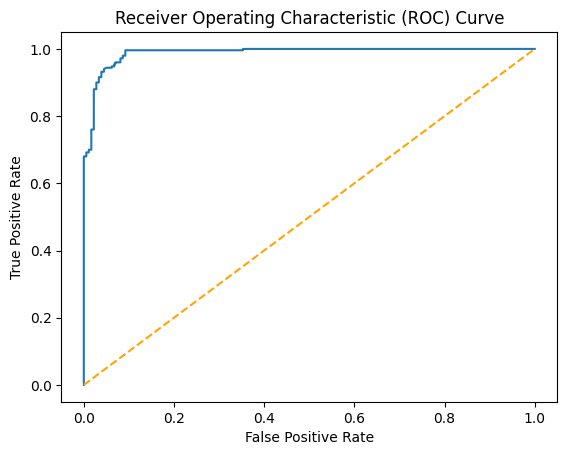

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores,sample_weight=w_test.values.ravel())

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', color='orange')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

[1.57611749e+02 1.40472948e+00 2.71785340e+00 1.88004835e-02
 0.00000000e+00 0.00000000e+00 1.13145483e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.36160221e+01
 1.82414554e+01 3.20891302e+00 1.56426551e-01 2.72508964e+00
 1.38326740e+00 1.86269459e+00 1.56115603e+00 2.94325642e+00
 1.39341493e+00 1.41604403e+00 1.13145483e-02 1.38210038e+00
 1.39341493e+00 0.00000000e+00 1.39341493e+00 4.53255952e-04
 5.54711521e+00 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.38210038e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.10756846e+01 1.86454769e-01
 1.13145483e-02 4.20992864e-04 1.54984148e+00 0.00000000e+00
 3.24167650e-01 0.00000000e+00 1.21562464e+01 3.01150318e-02
 2.26290966e-02 1.56115603e+00 0.00000000e+00 1.23317821e+01
 3.73299559e+01 1.72038131e+02]


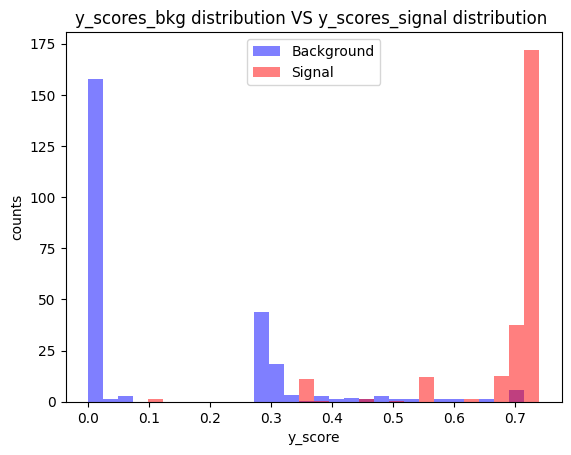

In [ ]:
# Plot signal and background distributions for the predicted scores with normalized counts and log scale

num_bins = 30  # Number of bins

# Compute the range for the bins based on the minimum and maximum values of the data
min_value = min(min(y_test_scores[y_test_arr == 0]), min(y_test_scores[y_test_arr == 1]))
max_value = max(max(y_test_scores[y_test_arr == 0]), max(y_test_scores[y_test_arr == 1]))
bin_range = (min_value, max_value)

counts, bins, _ = plt.hist(y_test_scores[y_test_arr == 0], bins=num_bins, range=bin_range,  weights=w_test[y_test_arr==0], alpha=0.5, color='b', label='Background')
counts2, bins2, _ = plt.hist(y_test_scores[y_test_arr == 1], bins=num_bins, range=bin_range,weights=w_test[y_test_arr==0], alpha=0.5, color='r', label='Signal')

print(counts)
print(counts2)

plt.xlabel('y_score')
plt.ylabel('counts')
plt.title('y_scores_bkg distribution VS y_scores_signal distribution ')
plt.legend()
plt.show()

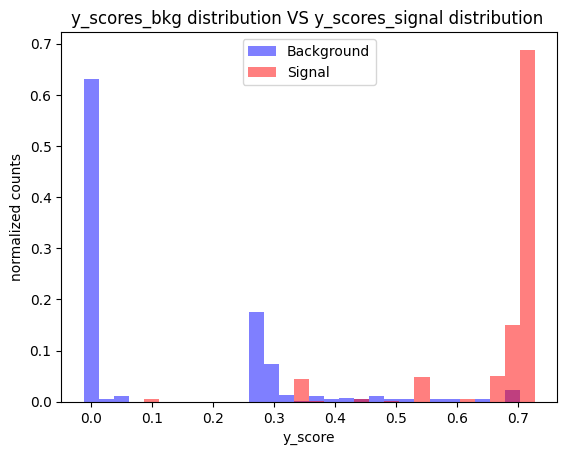

In [ ]:
# Plot signal and background distributions for the predicted scores with normalized counts

counts = counts / sum(counts)
counts2 = counts2 / sum(counts2)

plt.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5, color='b', label='Background')
plt.bar(bins2[:-1], counts2, width=np.diff(bins2), alpha=0.5, color='r', label='Signal')

plt.xlabel('y_score')
plt.ylabel('normalized counts')
plt.title('y_scores_bkg distribution VS y_scores_signal distribution ')
plt.legend()
plt.show()

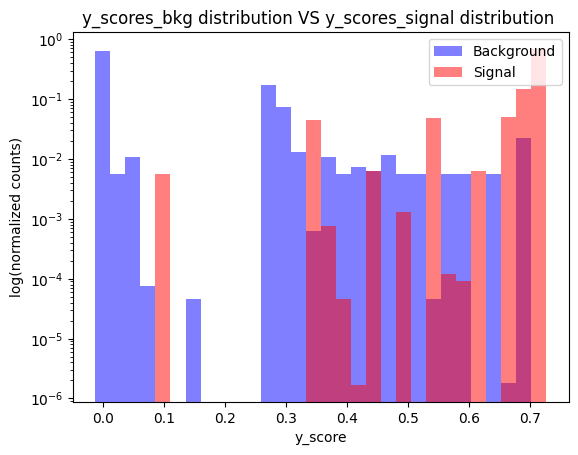

In [ ]:
# Normalize the counts
counts = counts / sum(counts)
counts2 = counts2 / sum(counts2)

plt.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5, color='b', label='Background')
plt.bar(bins2[:-1], counts2, width=np.diff(bins2), alpha=0.5, color='r', label='Signal')

plt.xlabel('y_score')
plt.ylabel('log(normalized counts)')
plt.title('y_scores_bkg distribution VS y_scores_signal distribution ')
plt.yscale('log')
plt.legend()
plt.show()

### VQC

#### Pennylane (V1)

In [ ]:
# Split the original data into train, validation and test sets for each dataset
data_frame_fcnc_train = data_frame_fcnc.loc[data_frame_fcnc['gen_split'] == 'train']
data_frame_bkg_train =  data_frame_bkg.loc[data_frame_bkg['gen_split'] == 'train']

data_frame_fcnc_test = data_frame_fcnc.loc[data_frame_fcnc['gen_split'] == 'test']
data_frame_bkg_test =  data_frame_bkg.loc[data_frame_bkg['gen_split'] == 'test']

data_frame_fcnc_val = data_frame_fcnc.loc[data_frame_fcnc['gen_split'] == 'val']
data_frame_bkg_val =  data_frame_bkg.loc[data_frame_bkg['gen_split'] == 'val']


# get 250 points of each dataset and  join the datasets (randomly)
train_fcnc = data_frame_fcnc_train.sample(n=250)
train_bkg = data_frame_bkg_train.sample(n=250)
train = pd.concat([train_fcnc, train_bkg])
train = train.sample(frac=1, random_state=42)

test_fcnc = data_frame_fcnc_test.sample(n=250)
test_bkg = data_frame_bkg_test.sample(n=250)
test= pd.concat([test_fcnc, test_bkg])
test = train.sample(frac=1, random_state=42)

val_fnc = data_frame_fcnc_val.sample(n=250)
val_bkg = data_frame_bkg_val.sample(n=250)
val = pd.concat([val_fnc, val_bkg])
val = val.sample(frac=1, random_state=42)

# get the weights for each dataset
w_train = train[['gen_xsec']]
w_test = test[['gen_xsec']]
w_val = val[['gen_xsec']]


# change the signal and bkg labels to 0 and 1 and get the labels for each dataset
train = train.replace(['signal'], 1)
train= train.replace(['bkg'], 0)
y_train = train[['gen_label']]
x_train = train[['MissingET_MET', 'Jet1_BTag']]

test = test.replace(['signal'], 1)
test= test.replace(['bkg'], 0)
y_test = test[['gen_label']]
x_test = test[['MissingET_MET', 'Jet1_BTag']]

val = val.replace(['signal'], 1)
val= val.replace(['bkg'], 0)
y_val = val[['gen_label']]
x_val = val[['MissingET_MET', 'Jet1_BTag']]

y_train_arr = np.concatenate(y_train.values, axis=0 )
y_val_arr = np.concatenate( y_val.values, axis=0 )
y_test_arr = np.concatenate( y_test.values, axis=0 )

# Renormalize data weights
w_train[y_train_arr == 1] = (w_train[y_train_arr == 1] / w_train[y_train_arr == 1].sum()) * y_train_arr.shape[0] / 2
w_train[y_train_arr == 0] = (w_train[y_train_arr == 0] / w_train[y_train_arr == 0].sum()) * y_train_arr.shape[0] / 2
        
w_test[y_test_arr == 1] = (w_test[y_test_arr == 1] / w_test[y_test_arr == 1].sum()) * w_test.shape[0] / 2
w_test[y_test_arr == 0] = (w_test[y_test_arr == 0] / w_test[y_test_arr == 0].sum()) * w_test.shape[0] / 2
        
w_val[y_test_arr == 1] = (w_val[y_test_arr == 1] / w_val[y_test_arr == 1].sum()) * w_val.shape[0] / 2
w_val[y_test_arr == 0] = (w_val[y_test_arr == 0] / w_val[y_test_arr == 0].sum()) * w_val.shape[0] / 2

# Concatenate features
X = np.concatenate([x_train, x_test,x_val])

# Normalize the data for angle embeding  (Put the data between -pi and pi)
X = (((X - X.min()) / (X.max() - X.min())) * 2 - 1) * (np.pi)

# Split the features array into train, validation and test sets
x_train = X[:500]
x_test = X[500:1000]
x_val = X[1000:]

In [ ]:
# accuracy function
def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss


In [ ]:
# loss function
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

# quantum circuit function
def circuit(n_features, n_layers, weights, x):
        # Embedding
        
        qml.AngleEmbedding(x,range (0, n_features),rotation="X" )

        # For every layer
        for layer in range(n_layers):
            W1 = weights[layer]

            # Define Rotations
            for i in range(0,n_features):
                qml.Rot(W1[i, 0], W1[i, 1], W1[i, 2], wires=i)

            # Entanglement
            if n_features != 1:
                if n_features > 2:
                    for i in range(n_features):
                        if i == n_features - 1:
                            qml.CNOT(wires=[i, 0])
                        else:
                            qml.CNOT(wires=[i, i + 1])
                else:
                    qml.CNOT(wires=[1, 0])

        return qml.expval(qml.PauliZ(0))

# classifier function    
def classifier(n_features, n_layers, weights, x):
        #c = circuit(n_features, n_layers, weights, x)
        dev=qml.device("default.qubit", wires=n_features)
        return qml.QNode(circuit, dev)(n_features, n_layers, weights, x)
    
# cost function    
def cost(n_features, n_layers,weights,X,Y,W):  
        # Compute predictions
        y_scores = [(classifier(n_features, n_layers,weights, x) + 1) / 2 for x in X]

        loss = square_loss(Y, y_scores)
        loss = loss * W
        loss = loss.sum()
        
        return loss
    
# train step function    
def train_step(n_features, n_layers,x_train,y_train, w_train, weights, opt,desc='Training'):
        
        # Only require grad if necessary
        x_train = np.array(x_train, requires_grad=False)
        y_train = np.array(y_train, requires_grad=True)
        w_train = np.array(w_train, requires_grad=False)

        # Compute cost and update weights
        weights, loss = opt.step_and_cost(cost, n_features, n_layers,weights, X=x_train, Y=y_train, W=w_train)

        return loss, weights
    
# validation step function
def validation_step(n_features, n_layers, x_val, y_val, w_val, weights, best_score, epoch_number, best_score_epoch,best_weights,desc='Validation'):
    X_val = np.array(x_val, requires_grad=False)
    Y_val = np.array(y_val, requires_grad=False)
    W_val = np.array(w_val, requires_grad=False)

    y_scores = np.array([classifier(n_features, n_layers, weights, x) for x in X_val])
    y_scores = (y_scores + 1) / 2

    W_val[Y_val == 1] = (W_val[Y_val == 1] / W_val[Y_val == 1].sum()) * W_val.shape[0] / 2
    W_val[Y_val == 0] = (W_val[Y_val == 0] / W_val[Y_val == 0].sum()) * W_val.shape[0] / 2

    auc_score = roc_auc_score(y_true=Y_val, y_score=y_scores, sample_weight=W_val)
    loss = cost(n_features, n_layers, weights, X_val, Y_val, W_val)


    if best_score is None or auc_score > best_score:
        best_score = auc_score
        best_score_epoch = epoch_number
        best_weights = weights

    tqdm.write(f"Epoch: {epoch_number}, Validation Loss: {loss:.4f}, AUC Score: {auc_score:.4f}")

    return best_score, best_score_epoch, best_weights
        
        
# train function
def train(n_features, n_layers, x_train, y_train, learning_rate, weights, max_epochs, epoch_number):
    opt = AdamOptimizer(learning_rate)
    best_score = None
    best_weights = None
    best_score_epoch = None

    with tqdm(total=max_epochs, desc='Epoch', unit='epoch') as pbar:
        for epoch in range(epoch_number, max_epochs):
            epoch_number = epoch

            loss, nf_nl_weights = train_step(n_features, n_layers, x_train, y_train, w_train, weights, opt, desc='Training')
            
            # Log variable values using tqdm.write
            tqdm.write(f"Epoch: {epoch_number:}, Loss: {loss:.4f}")
            
            
            weights = nf_nl_weights[2:]
            weights = weights[0]

            if epoch_number == max_epochs - 1 or (epoch_number+1)%5==0:
                best_score, best_score_epoch, best_weights = validation_step(n_features, n_layers, x_val, y_val, w_val, weights, best_score, epoch_number, best_score_epoch, best_weights,desc='Validation')
                # early stopping
                if epoch_number - best_score_epoch > 30 and epoch_number > 80:
                    tqdm.write(f"Early stopping at epoch {epoch_number}")
                    break

            pbar.update(1)  # Update progress bar
        tqdm.write(f"Best Score: {best_score:.4f}")            
        
    return best_score, best_weights

In [ ]:
# number of features and layers
n_features = 2
n_layers = 3

# Random weight initialization
weights = 0.01 * np.random.randn(n_layers, n_features, 3, requires_grad=True)

# We create a quantum device with n_features "wires" (or qubits)
dev = qml.device('default.qubit', wires=n_features)

# train the model
best_score, best_weights = train (n_features, n_layers,x_train,y_train_arr,0.01, weights, 1000, 0)


Epoch:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Epoch: 0, Loss: 149.5982
Epoch: 1, Loss: 149.5620
Epoch: 2, Loss: 149.4617
Epoch: 3, Loss: 149.2661
Epoch: 4, Loss: 148.9522
Epoch: 5, Loss: 148.5133
Epoch: 6, Loss: 147.9492
Epoch: 7, Loss: 147.2643
Epoch: 8, Loss: 146.4682
Epoch: 9, Loss: 145.5749
Epoch: 9, Validation Loss: 144.8927, AUC Score: 0.3704
Epoch: 10, Loss: 144.6027
Epoch: 11, Loss: 143.5733
Epoch: 12, Loss: 142.5100
Epoch: 13, Loss: 141.4359
Epoch: 14, Loss: 140.3715
Epoch: 15, Loss: 139.3336
Epoch: 16, Loss: 138.3354
Epoch: 17, Loss: 137.3855
Epoch: 18, Loss: 136.4874
Epoch: 19, Loss: 135.6393
Epoch: 19, Validation Loss: 135.1311, AUC Score: 0.3701
Epoch: 20, Loss: 134.8367
Epoch: 21, Loss: 134.0747
Epoch: 22, Loss: 133.3493
Epoch: 23, Loss: 132.6579
Epoch: 24, Loss: 131.9991
Epoch: 25, Loss: 131.3728
Epoch: 26, Loss: 130.7798
Epoch: 27, Loss: 130.2216
Epoch: 28, Loss: 129.6998
Epoch: 29, Loss: 129.2155
Epoch: 29, Validation Loss: 132.2050, AUC Score: 0.4398
Epoch: 30, Loss: 128.7693
Epoch: 31, Loss: 128.3605
Epoch: 32, 

In [ ]:
print (best_score)

0.5990528349537453


In [ ]:
# test the model

def test(n_features, n_layers,x_test,y_test,w_test, weights):
        # Remove grad
        X_test = np.array(x_test, requires_grad=False)
        Y_test = np.array(y_test, requires_grad=False)
        W_test = np.array(w_test, requires_grad=False)

        # This will be between -1 and 1, we need to convert to between 0 and 1
        y_scores = np.array([classifier(n_features, n_layers,weights, x) for x in X_test])
        y_scores = (y_scores + 1) / 2

        # Renormalize weights
        W_test[Y_test == 1] = (W_test[Y_test == 1] / W_test[Y_test == 1].sum()) * W_test.shape[0] / 2
        W_test[Y_test == 0] = (W_test[Y_test == 0] / W_test[Y_test == 0].sum()) * W_test.shape[0] / 2

        # Calculate ROC
        auc_score = roc_auc_score(y_true=Y_test, y_score=y_scores, sample_weight=W_test)
        
        return auc_score
    
auc_score = test(n_features, n_layers,x_test,y_test,w_test, best_weights)
print (auc_score)

0.7338559120112208
